In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('./bestsellers-with-categories.csv')

<p> ¿Como está mi data? </p>

In [48]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


<p> ¿Cual es el Autor más vendido? </p>

In [49]:
autor = df.groupby('Author')['Author'].count()
autor.sort_values(ascending=False).head(10) 
#para no hacer muy larga la lista solo selecciono los primeros 10

Author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Bill O'Reilly                          7
Name: Author, dtype: int64

<p>Ahora sabemos que el autor que más ha publicado es Jeff Kinney, pero,¿Qué es lo que publica él? </p>

In [75]:
jeff = df.loc[df['Author'] == 'Jeff Kinney'].sort_values(ascending=True, by='Year')
jeff

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


<p> Lo primero que notamos es que publica libros de ficción, y además, que es toda una saga, que cada año vende un Best Seller de manera ininterrumpida </p>
<p> También vemos que la cantidad de **Reviews** tiene una tendencia positiva y su **User Rating** se mantiene </p>

<Axes: xlabel='Year'>

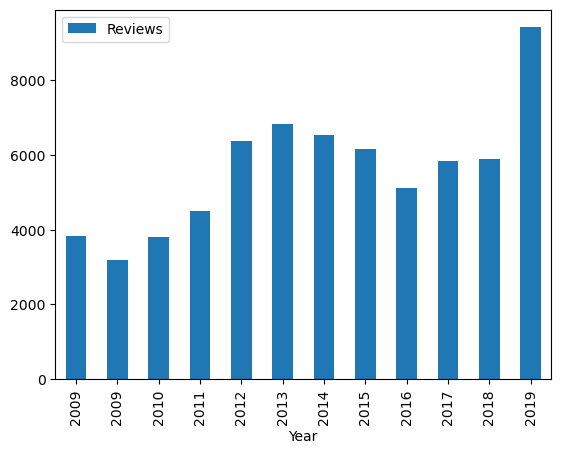

In [76]:
jeff.plot(kind='bar', x='Year', y='Reviews')

<p> ¿Acaso los autores de ficción venden más que los de no ficción?.
Primero veamos la cantidad de libros de cada genero </p>

In [85]:
gnero = df.groupby('Genre')['Genre'].count()
gnero

Genre
Fiction        240
Non Fiction    310
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

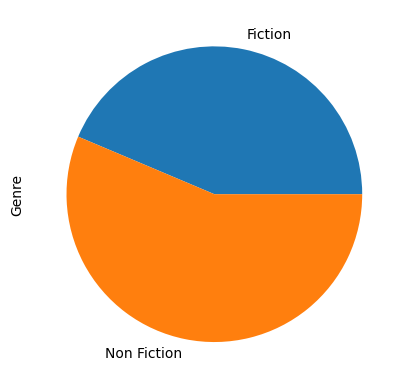

In [86]:
gnero.plot(kind='pie', x='Genre', y='gnero')

<p>Bueno, pues realmente no, la ficción no supera a la realidad.</p>

<p> ¿Pero, cual es el genero que escriben los 10 autores más vendidos? </p>

<p> Necesito una lista de los 10 mejor, anteriormente ya la habia obtenido, pero como PandaSeries, lo que no me sirve para el filtrado, entonces el primer paso es obtener una lista a partir de allí. Desglosemos para entenderlo mejor </p>

In [139]:
b = autor.sort_values(ascending=False).head(10) #autor corresponde al conteo agrupado por 'Author' del df
b1 = b.index                                   #saco los indices
b10 = list(b1)                                 #esos indices los paso a una lista
b10

['Jeff Kinney',
 'Gary Chapman',
 'Suzanne Collins',
 'Rick Riordan',
 'American Psychological Association',
 'Gallup',
 'Dr. Seuss',
 'Rob Elliott',
 'Eric Carle',
 "Bill O'Reilly"]

<p>Ahora, filtramos el df de acuerdo a mi lista de b10 </p>

In [146]:
df_b10 = df[df['Author'].isin(b10) ]
df_b10

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
...,...,...,...,...,...,...,...
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
528,What Pet Should I Get? (Classic Seuss),Dr. Seuss,4.7,1873,14,2015,Fiction


<p> Ahora, teniendo este DataFrame, si puedo hacer el conteo de cuantos de los libros publicados por los 10 autores mas vendidos son 'Fiction' y cuantos no </p>

In [148]:
gnero_b10 = df_b10.groupby('Genre')['Genre'].count()
gnero_b10

Genre
Fiction        50
Non Fiction    45
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

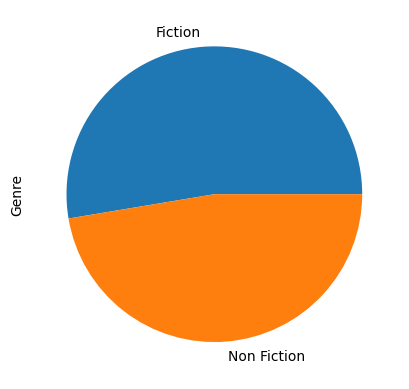

In [149]:
gnero_b10.plot(kind='pie', x='Genre', y='gnero')

<p>Vemos nuevamente una distribución de los datos másomenos equitativa, sin embargo la diferencia no es mucha, solo 5 libros más. </p>

<p> Ahora, ¿como es la distribución general de los precios de los libros? Estoy tomandolo en general, no solo los best seller, eso va luego</p>

<Axes: xlabel='Price'>

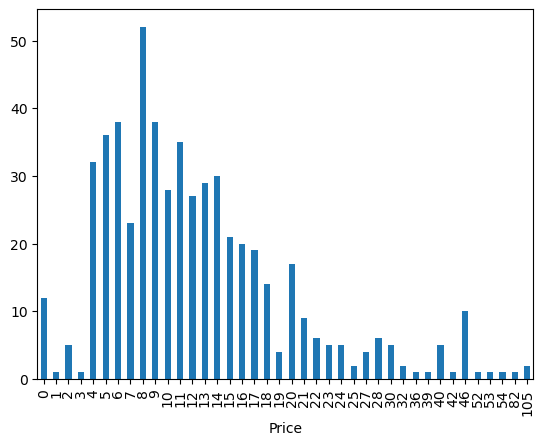

In [159]:
#precio general 
price = df.groupby('Price')['Price'].count()
price.plot(kind='bar', x='Price', y='price')

<p>Ahora, veamos cual es la distribución de los precios de los libros vendidos por los 10 mejores autores </p>

<Axes: xlabel='Price'>

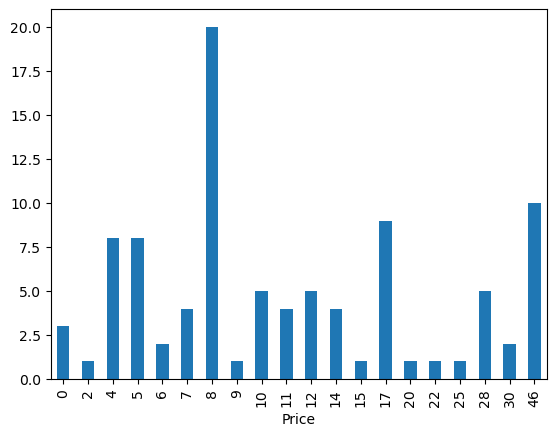

In [160]:
price_b10 = df_b10.groupby('Price')['Price'].count()
price_b10.plot(kind='bar', x='Price', y='price')

<p> En ambas graficar los libros de 8 dolares estuvieron muy por encima del resto. Curiosamente hay 10 Best Sellers que a pesar de costar 46 dolares se posicionaron muy bien.

Sin embargo, es claro que de manera general hay preferencia por los libros de menos de 20 dolares. 
En esta segunda grafica me parece más interesante saber cuales son las medidas de tendencia central y de dispersión de ese conjunto de datos.
</p>

In [184]:
#media : 4.75
price_b10.mean()
#mediana : 4.0
price_b10.median()
price_b10.std() #desviación estandar : 4.60

4.6097722286464435

<Axes: >

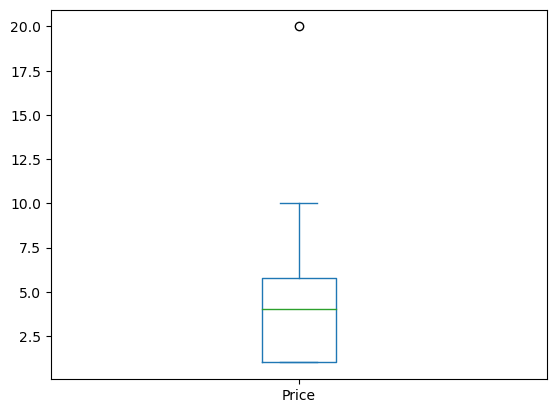

In [187]:
price_b10.plot(kind='box', x='Price', y='price')

In [185]:
np.percentile(price_b10,75)

5.75

Bueno, ya queda clara la distribución de los precios y la preferencia de los lectores

In [183]:
price.mean() #13.75
price.median() # 6
price.std()
np.percentile(price,100)

52.0

<Axes: >

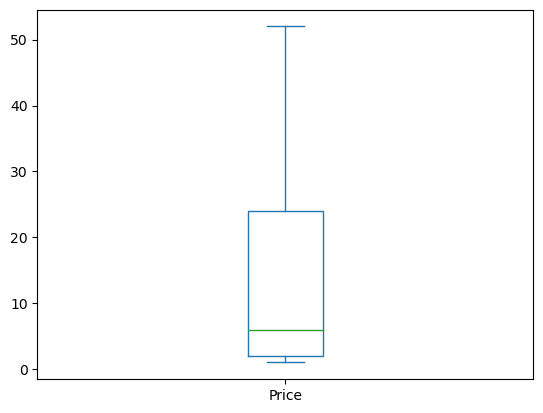

In [188]:
price.plot(kind='box', x='Price', y='price')

<h3> Conclusiones:  </h3>
<p> 
    <ul>
        <li>
        Podemos pensar que el precio de los libros influye en la cantidad de lectores, pues finalmente la compra de estos es lo que los hace Best Sellers, evidenciando que los libros de menos de 20 dolares son los que mayor acogida tienen 
        </li>
        <li> 
        De de manera general, la ficción no supera a la relidad (jaja), pues si se venden más libros de 'non fiction'. Sin embargo, el autor más vendido si escribe 'Fiction'.
        </li>
        <li>
        El 
        </li>
    </ul>
</p> 

In [217]:
df_b10.loc[:,['Author','Genre']].groupby('Genre')['Author']